In [ ]:
#EDA contd
import pandas as pd
chips = pd.read_csv('http://bit.ly/chiporders',sep='\t')

Order ID: A unique identifier for each order. Quantity: The number of items ordered. Item Name: The name of the menu item. Choice Description: Additional details or customization options for the ordered item. Item Price: The price of the individual item. Order Date: The date and time when the order was placed. Total: The total cost of the order.

In [ ]:
chips.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
chips.shape[0]

4622

In [ ]:
chips['order_id'].value_counts().head(15) #each order id ordered how many different times


926     23
1483    14
205     12
759     11
1786    11
691     11
491     10
561      9
1660     9
916      8
953      8
195      8
818      8
1006     8
511      7
Name: order_id, dtype: int64

In [ ]:
#Extract the information of all oredered items containing chicken as one of the ingredint
chips[chips['item_name'] == 'Chicken']

,order_id,quantity,item_name,choice_description,item_price


In [ ]:
chk = chips[chips['item_name'].str.contains('Chicken')]

In [ ]:
chk.head(10)

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",$10.98
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49


In [ ]:
chips['item_price'].str.replace('$','').astype(float).max()

<ipython-input-22-6290fb738cab>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chips['item_price'].str.replace('$','').astype(float).max()


44.25

In [ ]:
c1=chips['item_price'].str.replace('$','')
c1.head(5)


<ipython-input-3-6183ef1c17a9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  c1=chips['item_price'].str.replace('$','')


0     2.39 
1     3.39 
2     3.39 
3     2.39 
4    16.98 
Name: item_price, dtype: object

In [ ]:
chips.loc[3598]['item_name']

'Chips and Fresh Tomato Salsa'

In [ ]:
#Explore oreder id as : - Each order id ordered how many items
chips.groupby('order_id')['quantity'].sum().head(20)

order_id
1     4
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     3
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    4
19    2
20    4
Name: quantity, dtype: int64

https://datascience.fm/pandas-for-simple-data-analysys/

Order ID: A unique identifier for each order.
Quantity: The number of items ordered.
Item Name: The name of the menu item.
Choice Description: Additional details or customization options for the ordered item.
Item Price: The price of the individual item.
Order Date: The date and time when the order was placed.
Total: The total cost of the order.

In [ ]:
# finding is there any columns present in our data
chips.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [ ]:
chips.index

RangeIndex(start=0, stop=4622, step=1)

In [ ]:
#Which was the most ordered item? and How many items were ordered?
c = chips.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(10)

<ipython-input-13-1371784ce59a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c = c.sum()


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351
Chips,208004,230
Steak Bowl,193752,221
Bottled Water,175944,211
Chips and Fresh Tomato Salsa,100419,130


In [ ]:
import pandas as pd
dt = pd.DataFrame({'id' : [1,2,2,2,3,3,3,4,5,6] ,
                       'order count' : [1,2,1,3,1,1,2,1,2,1]})
dt

,id,order count
0,1,1
1,2,2
2,2,1
3,2,3
4,3,1
5,3,1
6,3,2
7,4,1
8,5,2
9,6,1


In [ ]:
dt['id'].value_counts()

2    3
3    3
1    1
4    1
5    1
6    1
Name: id, dtype: int64

In [ ]:
dt.groupby('id')['order count'].sum()

id
1    1
2    6
3    4
4    1
5    2
6    1
Name: order count, dtype: int64

In [ ]:
https://builtin.com/software-engineering-perspectives/pandas-iloc

https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/

In [ ]:
TI=pd.read_csv('TRAIN1.csv')

In [ ]:
TI.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
TI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
TI.loc[TI['Sex']=='male'] #to get list of male passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic=TI
titanic.loc[(titanic['Sex']=='male') & (titanic['Embarked']=='S')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [ ]:
titanic.loc[0:5,['Sex','Age']]

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN


In [ ]:
titanic.iloc[0:4,2:5]

,Pclass,Name,Sex
0,3,"Braund, Mr. Owen Harris",male
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,"Heikkinen, Miss. Laina",female
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


In [ ]:
# importing the module
import pandas as pd

# creating a sample dataframe
data = pd.DataFrame({'Brand': ['Maruti', 'Hyundai', 'Tata',
							'Mahindra', 'Maruti', 'Hyundai',
							'Renault', 'Tata', 'Maruti'],
					'Year': [2012, 2014, 2011, 2015, 2012,
							2016, 2014, 2018, 2019],
					'Kms Driven': [50000, 30000, 60000,
									25000, 10000, 46000,
									31000, 15000, 12000],
					'City': ['Gurgaon', 'Delhi', 'Mumbai',
							'Delhi', 'Mumbai', 'Delhi',
							'Mumbai', 'Chennai', 'Ghaziabad'],
					'Mileage': [28, 27, 25, 26, 28,
								29, 24, 21, 24]})

# displaying the DataFrame
display(data)


,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,28
1,Hyundai,2014,30000,Delhi,27
2,Tata,2011,60000,Mumbai,25
3,Mahindra,2015,25000,Delhi,26
4,Maruti,2012,10000,Mumbai,28
5,Hyundai,2016,46000,Delhi,29
6,Renault,2014,31000,Mumbai,24
7,Tata,2018,15000,Chennai,21
8,Maruti,2019,12000,Ghaziabad,24


In [ ]:
# selecting cars with brand 'Maruti' and Mileage > 25
display(data.loc[(data.Brand == 'Maruti') & (data.Mileage > 25)])

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,28
4,Maruti,2012,10000,Mumbai,28


In [ ]:
# selecting range of rows from 2 to 5
display(data.loc[2: 5])

,Brand,Year,Kms Driven,City,Mileage
2,Tata,2011,60000,Mumbai,25
3,Mahindra,2015,25000,Delhi,26
4,Maruti,2012,10000,Mumbai,28
5,Hyundai,2016,46000,Delhi,29


In [ ]:
# updating values of Mileage if Year < 2015
data.loc[(data.Year < 2015), ['Mileage']] = 22
display(data)

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,22
1,Hyundai,2014,30000,Delhi,22
2,Tata,2011,60000,Mumbai,22
3,Mahindra,2015,25000,Delhi,26
4,Maruti,2012,10000,Mumbai,22
5,Hyundai,2016,46000,Delhi,29
6,Renault,2014,31000,Mumbai,22
7,Tata,2018,15000,Chennai,21
8,Maruti,2019,12000,Ghaziabad,24


In [ ]:

# selecting 0th, 2nd, 4th, and 7th index rows
display(data.iloc[[0, 2, 4, 7]])

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,22
2,Tata,2011,60000,Mumbai,22
4,Maruti,2012,10000,Mumbai,22
7,Tata,2018,15000,Chennai,21


In [ ]:
# selecting rows from 1 to 4 and columns from 2 to 4
display(data.iloc[1: 5, 2: 5])

,Kms Driven,City,Mileage
1,30000,Delhi,22
2,60000,Mumbai,22
3,25000,Delhi,26
4,10000,Mumbai,22


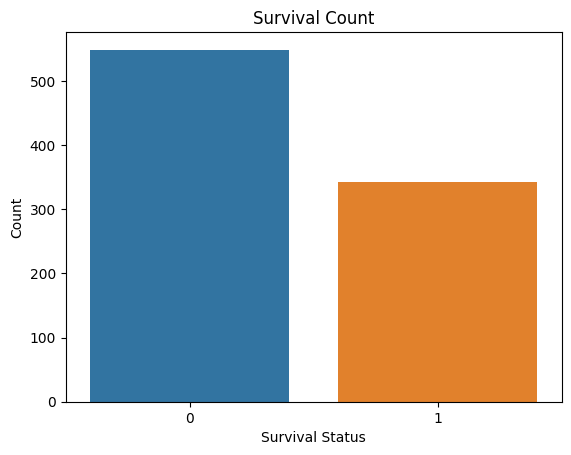

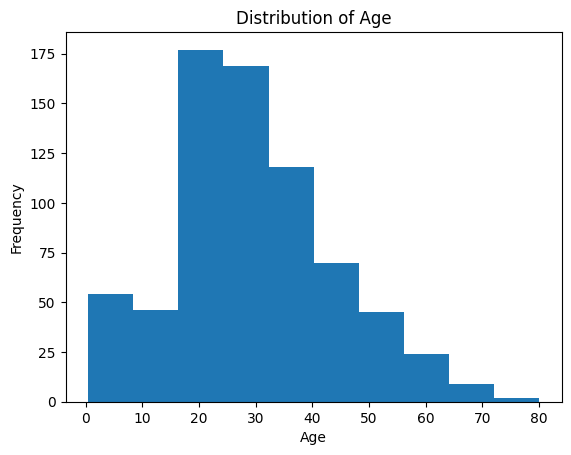

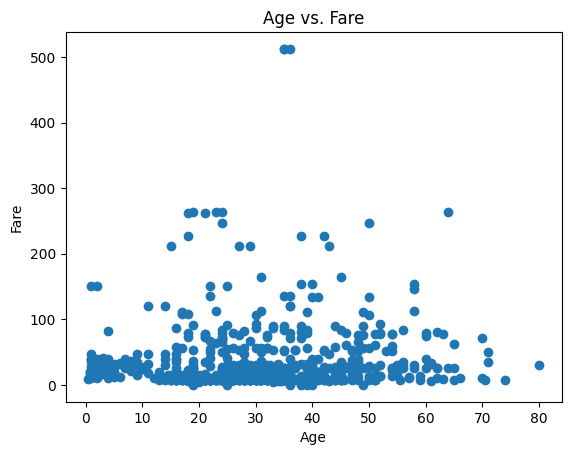

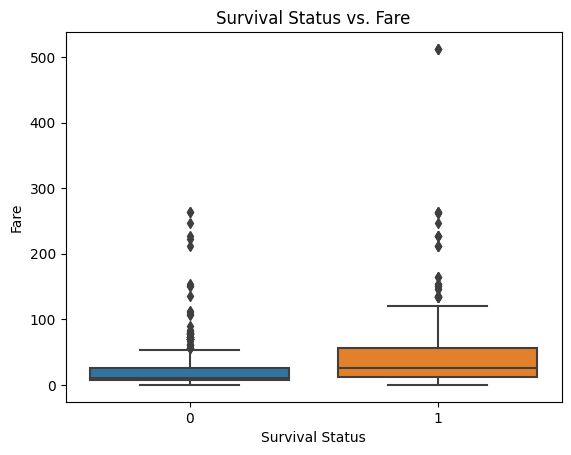

In [ ]:
# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

df=titanic
sns.countplot(x='Survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Histogram
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

# Box plot
sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()